In [1]:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline


Location = "Speed Dating Data.csv"
df = pd.read_csv(Location)

***Creating a dataframe with one row for each respondent. The respondent dataframe has 551 observations.

In [2]:
dating_respondent = df.drop_duplicates(['iid'], keep = 'last')

In [4]:
dating_respondent['iid'].count()

551

***Creating a dataframe only with variables that might be needed for analysis

In [3]:
dating_respondent_analysis=dating_respondent[['iid','gender','age','field_cd','race','goal','date','go_out','career_c','exphappy','expnum','dec','like','prob','match_es','satis_2','length','numdat_2', 'date_3']]

In [5]:
dating_respondent_analysis.head()

,iid,gender,age,field_cd,race,goal,date,go_out,career_c,exphappy,expnum,dec,like,prob,match_es,satis_2,length,numdat_2,date_3
9,1,0,21.0,1.0,4.0,2.0,7.0,1.0,NaN,3.0,2.0,1,6.0,6.0,4.0,6.0,2.0,1.0,0.0
19,2,0,24.0,1.0,2.0,1.0,5.0,1.0,NaN,4.0,5.0,1,8.0,7.0,3.0,5.0,2.0,NaN,0.0
29,3,0,25.0,2.0,2.0,6.0,3.0,1.0,NaN,4.0,2.0,0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
39,4,0,23.0,1.0,2.0,1.0,5.0,1.0,1.0,1.0,2.0,1,10.0,8.0,2.0,4.0,3.0,2.0,0.0
49,5,0,21.0,1.0,2.0,2.0,4.0,1.0,1.0,7.0,10.0,1,10.0,3.0,NaN,7.0,2.0,2.0,0.0


***Checking what variables have missing values. If a variable has 12 or less missing values, the rows with missing values are not removed. In other cases, they are. For expnum, match_es some respondents could have put "0" as a number. In this case, it would not be a missing data point.  

In [6]:
dating_respondent_analysis.isnull().sum()

iid           0
gender        0
age           8
field_cd      7
race          6
goal          7
date          8
go_out        7
career_c     12
exphappy      8
expnum      425
dec           0
like         21
prob         26
match_es     72
satis_2      66
length       66
numdat_2     69
date_3      288
dtype: int64

***Looking at demographic characteristics of the experiment participants. 

***Result: The average age is 26, with 24 and 28 in 25 and 75 quartiles (without removing a 55-year old outlier). The age distribution is almost the same for male and female participants. Majority of the participants are White or Asian- American. The gender distribution is almost half and half. Majority of female participants checked social science, education, biological science as their field of study, while overwhelming majority of male participants checked business/finance as their field of study.

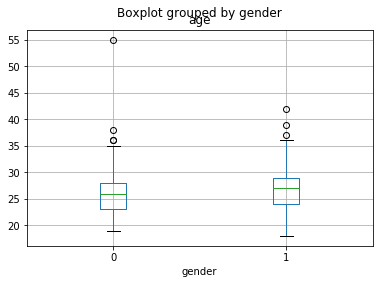

In [7]:
dating_respondent_analysis.boxplot(by='gender', column='age')

In [11]:
dating_respondent_analysis['field_cd'].value_counts()

8.0     130
10.0     61
5.0      56
1.0      48
13.0     46
3.0      46
9.0      40
11.0     30
6.0      21
7.0      17
2.0      14
15.0     11
4.0       9
14.0      7
18.0      3
16.0      3
17.0      1
12.0      1
Name: field_cd, dtype: int64

In [12]:
career_gender = dating_respondent_analysis['field_cd'].groupby(dating_respondent_analysis['gender'])
career_gender.value_counts()

gender  field_cd
0       3.0          36
        9.0          35
        10.0         31
        8.0          30
        11.0         29
        13.0         25
        1.0          20
        6.0          16
        5.0          13
        15.0          9
        7.0           8
        4.0           7
        2.0           5
        14.0          3
        16.0          2
        18.0          1
1       8.0         100
        5.0          43
        10.0         30
        1.0          28
        13.0         21
        3.0          10
        2.0           9
        7.0           9
        6.0           5
        9.0           5
        14.0          4
        4.0           2
        15.0          2
        18.0          2
        11.0          1
        12.0          1
        16.0          1
        17.0          1
Name: field_cd, dtype: int64

In [10]:
dating_respondent_analysis['race'].value_counts()

2.0    304
4.0    136
3.0     42
6.0     37
1.0     26
Name: race, dtype: int64

In [11]:
dating_respondent_analysis['gender'].value_counts()

1    277
0    274
Name: gender, dtype: int64

***Looking into gender differences regarding why participants decided to attend the speed dating event. 

***Result: Contrary to general belief, more men than women answered they wanted to participate "to get a date" (68% vs 33%) and were "looking for a serious relationship" (59% vs 40%).

In [12]:
goal_gender_rate = pd.crosstab(index=dating_respondent_analysis['gender'], columns=dating_respondent_analysis['goal'])     
goal_gender_rate.columns = ["Fun night out","Meet new people","Get a date","Serious relationship", "Say I did it", "Other"]
goal_gender_rate.index= ["Female","Male"]
goal_gender_rate/goal_gender_rate.sum()*100

,Fun night out,Meet new people,Get a date,Serious relationship,Say I did it,Other
Female,50.438596,52.910053,32.5,40.909091,51.428571,46.666667
Male,49.561404,47.089947,67.5,59.090909,48.571429,53.333333


***Looking into gender differences regarding what could be loosely called "dating confidence." The questions asked were "Out of 20 people you will meet, how many do you expect will be interested in dating you?" (expnum), "How probable do you think it is that this person will say 'yes' for you? (prob), and "How many matches do you estimate you will get?"(match_es)

***Result: There is almost no difference in responses for women and men to the first two questions: both groups hoped to have approximately 6 out of 20 dates be interested in them, and in the scorecard they gave 5 points on the scale from 1 to 10 that a date would say 'yes.' Men were slightly more optimistic than women about number of matches they would get (3.1 vs 2.8).

In [13]:
expnum_gender = dating_respondent_analysis['expnum'].groupby(dating_respondent_analysis['gender'])
expnum_gender.mean()

gender
0    5.870968
1    5.906250
Name: expnum, dtype: float64

In [14]:
#removing rows with missing values for "prob"
no_missing_prob = dating_respondent_analysis[dating_respondent_analysis['prob'].notnull()]

In [15]:
no_missing_prob ['prob'].count()

525

In [16]:
prob_gender = no_missing_prob ['prob'].groupby(no_missing_prob ['gender'])
prob_gender.mean()

gender
0    5.160232
1    5.223684
Name: prob, dtype: float64

In [19]:
match_es_gender = dating_respondent_analysis['match_es'].groupby(dating_respondent_analysis['gender'])
match_es_gender.mean()

gender
0    2.881250
1    3.173222
Name: match_es, dtype: float64

*** Looking into gender differences in assessing of liking a date, being satisfied with the dates, and evaluating the speed dating event.

***Results: Men liked their dates slightly more than women did (6.2 vs. 5.7 points), they also were more satisfied with the people they met than women were (6 vs. 5.2 points).
Regarding the speed dating event itself, more men wanted to talk to more women and for more than 4 minutes (the allocated time for a conversation), while female participants said they met too many men, and 4 minutes were more than enough.

In [21]:
#removing rows with missing values for "like"
no_missing_like = dating_respondent_analysis[dating_respondent_analysis['like'].notnull()]

In [22]:
like_gender = dating_respondent_analysis['like'].groupby(dating_respondent_analysis['gender'])
like_gender.mean()

gender
0    5.763462
1    6.294444
Name: like, dtype: float64

In [23]:
#removing rows with missing values for "satis_2"
no_missing_satis = dating_respondent_analysis[dating_respondent_analysis['satis_2'].notnull()]

In [24]:
no_missing_satis ['satis_2'].count()

485

In [25]:
satis_gender = no_missing_satis ['satis_2'].groupby(no_missing_satis['gender'])
satis_gender.mean()

gender
0    5.289916
1    6.048583
Name: satis_2, dtype: float64

In [26]:
#removing rows with missing values for "length"
no_missing_length = dating_respondent_analysis[dating_respondent_analysis['length'].notnull()]
no_missing_length ['length'].count()

485

In [27]:
length_gender_rate = pd.crosstab(index=no_missing_length['gender'], columns=no_missing_length['length']) 
length_gender_rate/length_gender_rate.sum()*100

length,1.0,2.0,3.0
gender,,,
0,42.750929,64.285714,56.435644
1,57.249071,35.714286,43.564356


In [28]:
#removing rows with missing values for "numdat_2"
no_missing_numdat = dating_respondent_analysis[dating_respondent_analysis['numdat_2'].notnull()]
no_missing_numdat['numdat_2'].count()

482

In [29]:
numdat_gender_rate = pd.crosstab(index=no_missing_numdat['gender'], columns=no_missing_numdat['numdat_2']) 
numdat_gender_rate/numdat_gender_rate.sum()*100

numdat_2,1.0,2.0,3.0
gender,,,
0,44.444444,52.912621,46.948357
1,55.555556,47.087379,53.051643


***Creating a dataframe with all observations for dates and only with variables that might be needed for analysis.

In [4]:
dating_all = df[['iid', 'id','match','gender','pid','race','field_cd','dec','attr','sinc','intel','fun','amb','shar','like','date_3']]

In [5]:
dating_all.head()

,iid,id,match,gender,pid,race,field_cd,dec,attr,sinc,intel,fun,amb,shar,like,date_3
0,1,1.0,0,0,11.0,4.0,1.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,0.0
1,1,1.0,0,0,12.0,4.0,1.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,0.0
2,1,1.0,1,0,13.0,4.0,1.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,0.0
3,1,1.0,1,0,14.0,4.0,1.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,0.0
4,1,1.0,1,0,15.0,4.0,1.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,0.0


***After each speed date conversation, experiment participants had to fill in a scorecard, where they had to rate the partners they just talked to, using six attributes: attractive, sincere, intelligent, fun, ambitious, shared interests/hobbies. Let's explore if there is a difference in how men and women ranked their partners. Also, let's check if those who were or were not matched, on average, gave higher or lower scores on these attributes.

***Results: 
Men gave higher scores on attribute "attractive" than women did: 6.5 vs. 5.9. This is the highest difference in scores among all attributes. Women gave slightly higher score on ambition (7 vs. 6.6) and intelligence (7.4 vs. 7.3). Men gave slightly higher scores on sincerity (7.2 vs. 7.1), fun (6.5 vs. 6.3) and shared interest (5.5 vs. 5.4).
The respondents who were matched gave higher scores on all six attributes than the respondents who were not matched. For example, experiment participants who were matched, gave an average score of 7.3 on attractiveness, while participants who were not matched, gave 6.

In [20]:
# Checking missing values
dating_all.isnull().sum()

iid            0
id             1
match          0
gender         0
pid           10
race          63
field_cd      82
dec            0
attr         202
sinc         277
intel        296
fun          350
amb          712
shar        1067
like         240
date_3      4404
dtype: int64

In [19]:
dating_all['attr'].describe()

count    8176.000000
mean        6.189995
std         1.950169
min         0.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: attr, dtype: float64

In [6]:
attr_gender = dating_all['attr'].groupby(dating_all['gender'])
attr_gender.mean()

gender
0    5.919300
1    6.460029
Name: attr, dtype: float64

In [7]:
sinc_gender = dating_all['sinc'].groupby(dating_all['gender'])
sinc_gender.mean()

gender
0    7.099778
1    7.250680
Name: sinc, dtype: float64

In [8]:
intel_gender = dating_all['intel'].groupby(dating_all['gender'])
intel_gender.mean()

gender
0    7.447362
1    7.289988
Name: intel, dtype: float64

In [9]:
fun_gender = dating_all['fun'].groupby(dating_all['gender'])
fun_gender.mean()

gender
0    6.280555
1    6.519866
Name: fun, dtype: float64

In [10]:
amb_gender = dating_all['amb'].groupby(dating_all['gender'])
amb_gender.mean()

gender
0    6.952773
1    6.603278
Name: amb, dtype: float64

In [21]:
#removing rows with missing values for "shar"
no_missing_shar = dating_all[dating_all['shar'].notnull()]

In [22]:
shar_gender = no_missing_shar['shar'].groupby(no_missing_shar['gender'])
shar_gender.mean()

gender
0    5.407012
1    5.540373
Name: shar, dtype: float64

In [12]:
attr_match = dating_all['attr'].groupby(dating_all['match'])
attr_match.mean()

match
0    5.961230
1    7.319535
Name: attr, dtype: float64

In [14]:
sinc_match = dating_all['sinc'].groupby(dating_all['match'])
sinc_match.mean()

match
0    7.046056
1    7.809489
Name: sinc, dtype: float64

In [15]:
intel_match = dating_all['intel'].groupby(dating_all['match'])
intel_match.mean()

match
0    7.249851
1    7.950365
Name: intel, dtype: float64

In [16]:
fun_match = dating_all['fun'].groupby(dating_all['match'])
fun_match.mean()

match
0    6.155185
1    7.598535
Name: fun, dtype: float64

In [17]:
amb_match = dating_all['amb'].groupby(dating_all['match'])
amb_match.mean()

match
0    6.663891
1    7.332949
Name: amb, dtype: float64

In [23]:
shar_match = no_missing_shar['shar'].groupby(no_missing_shar['match'])
shar_match.mean()

match
0    5.208230
1    6.753571
Name: shar, dtype: float64